In [2]:
#!pip install pinecone

  Using cached pinecone-7.3.0-py3-none-any.whl.metadata (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.6/587.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


In [3]:
import pandas as pd
from pinecone import Pinecone

In [4]:
pc = Pinecone(api_key="pcsk_4w1uJP_Egb8Lj9gajXiw1xhvukfASBvAKiEvAZcQv9VgRKJAjRmgga21dFLcQ6rH5Qao1M")

succesfully connected with pinecone

In [7]:
from pinecone import ServerlessSpec

pc.create_index("newindex", dimension=8, metric="euclidean", spec=ServerlessSpec(cloud='aws', region='us-east-1'))
print(pc.describe_index("newindex"))

{'deletion_protection': 'disabled',
 'dimension': 8,
 'host': 'newindex-ovnr0h7.svc.aped-4627-b74a.pinecone.io',
 'metric': 'euclidean',
 'name': 'newindex',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'},
 'tags': None,
 'vector_type': 'dense'}


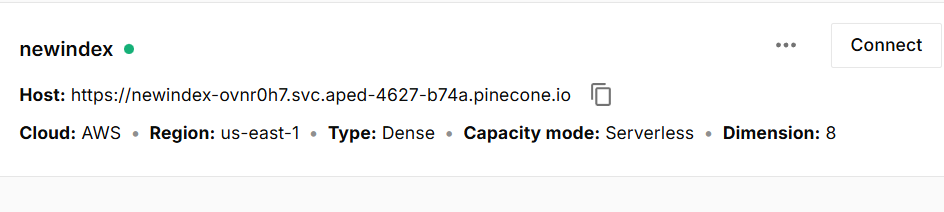

**Creating vectors inside it**

In [9]:
index = pc.Index("newindex")

In [12]:
index.upsert(
    vectors=[
        {'id': 'vec1', 'values': [2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'metadata': {'Pen': 2, 'Pencil': 4}},
        {'id': 'vec2', 'values': [4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'metadata': {'Pen': 4, 'Pencil': 3}},
        {'id': 'vec3', 'values': [1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'metadata': {'Pen': 1, 'Eraser': 2}},
        {'id': 'vec4', 'values': [2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'metadata': {'Pen': 2, 'Eraser': 2}}
    ],
    namespace="ns1"
)

{'upserted_count': 4}

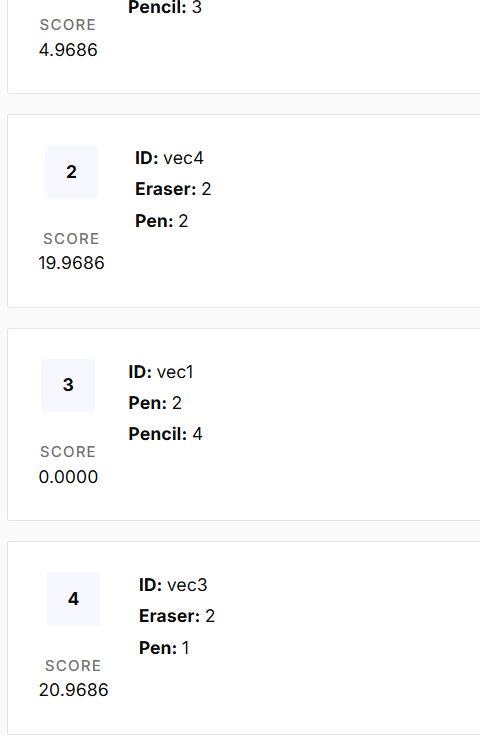

**Fetching Values**

In [14]:
print(index.fetch(["vec1","vec2"],"ns1"))

FetchResponse(namespace='ns1', vectors={'vec1': Vector(id='vec1', values=[2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], metadata={'Pen': 2.0, 'Pencil': 4.0}, sparse_values=None), 'vec2': Vector(id='vec2', values=[4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], metadata={'Pen': 4.0, 'Pencil': 3.0}, sparse_values=None)}, usage={'read_units': 1})


**Updations**
- use the upsert function provide the id of the
function [*index*]  you want to change
- partial or full update
- upsert or update function

Deletion
- delete all at once
- delete some particular by specifying id


In [16]:
index.delete(ids=['vec1'],namespace='ns1')

{}

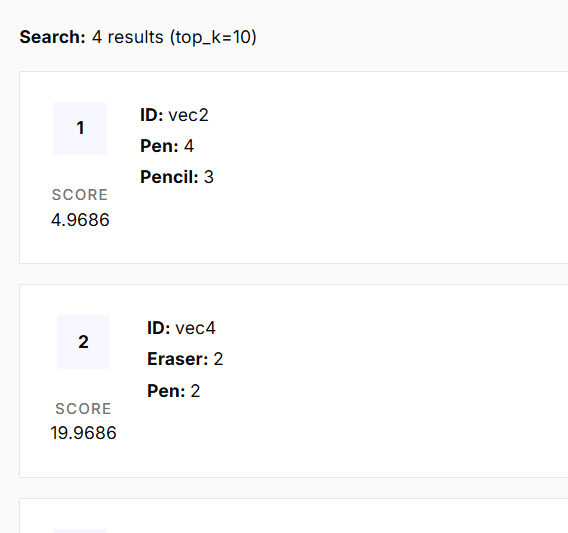

In [17]:
index.delete(delete_all=True,namespace='ns1')

{}

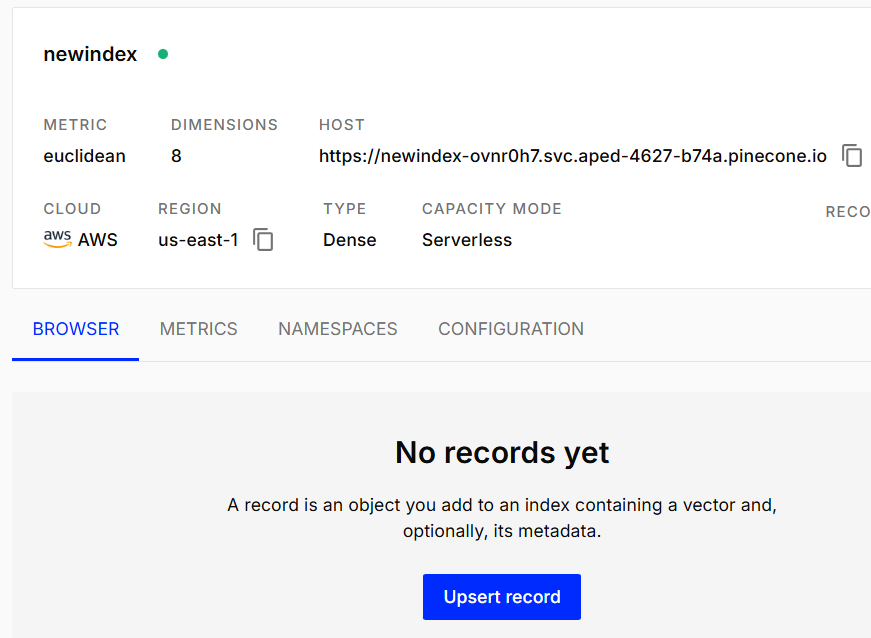

**Delete an Index **

In [19]:
pc.delete_index(name='newindex')

In [21]:
pc.delete_index(name='vectordb01')

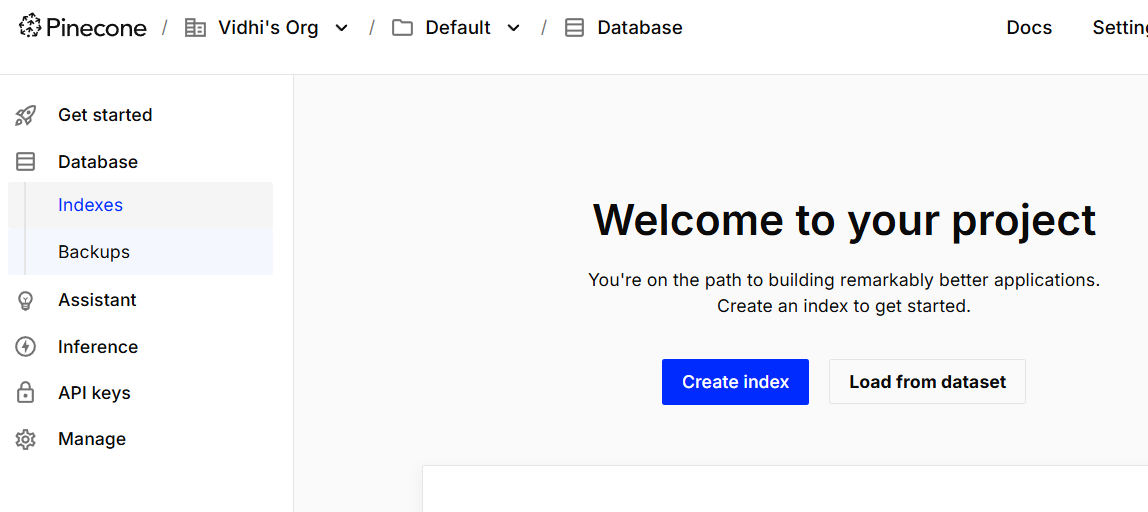